In [10]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
prophet = pd.read_csv('ProphetResults.csv')
arima = np.load('ArimaResults.npy')
deepar = pd.read_csv('DeepArResults.csv')
deepar_test = np.load('DeepArTest.npy')

In [11]:
df = pd.read_csv('Prophet.csv')
split = 2094
train, test = df[0:2094], df[2094:len(df)]

In [12]:
# df = pd.read_csv('Prophet.csv')
# split = 2090
# train, test = df[0:2090], df[2090:len(df)]

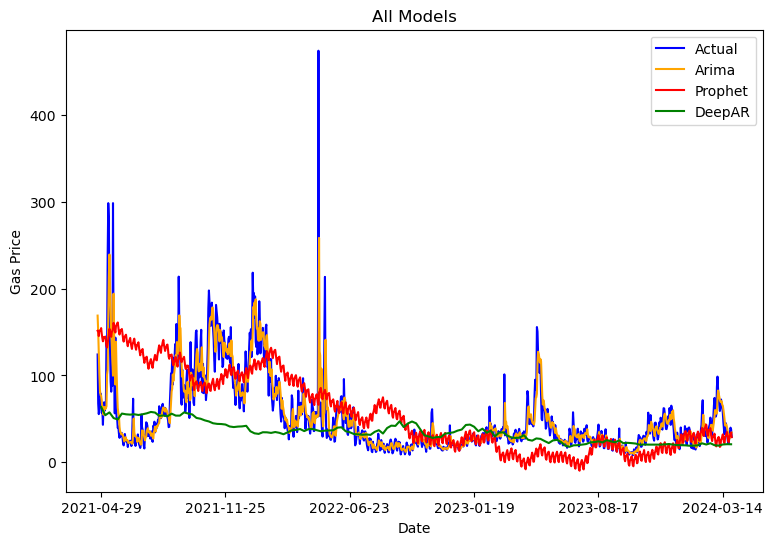

In [13]:
pyplot.figure(figsize = (9,6))
pyplot.plot(prophet.ds, test.y, color='blue', label='Actual')
pyplot.plot(prophet.ds, arima, color='orange', label='Arima')
pyplot.plot(prophet.ds, prophet.yhat, color='red', label='Prophet')
pyplot.plot(deepar["Date"], deepar["0.5"], color='green', label='DeepAR')
pyplot.gca().set_xticks(deepar["Date"][0::30])
pyplot.xlabel("Date")
pyplot.ylabel("Gas Price")
pyplot.title("All Models")
pyplot.legend()
pyplot.show()

In [23]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
arima_mse = mean_squared_error(test.y, arima)
arima_rmse = sqrt(arima_mse)
arima_mae = mean_absolute_error(test.y, arima)
arima_r2 = r2_score(test.y, arima)
prophet_mse = mean_squared_error(test.y, prophet.yhat)
prophet_rmse = sqrt(prophet_mse)
prophet_mae = mean_absolute_error(test.y, prophet.yhat)
prophet_r2 = r2_score(test.y, prophet.yhat)
deepar_mse = mean_squared_error(deepar_test, deepar["0.5"])
deepar_rmse = sqrt(deepar_mse)
deepar_mae = mean_absolute_error(deepar_test, deepar["0.5"])
deepar_r2 = r2_score(deepar_test, deepar["0.5"])
print('Arima MSE: %.3f' % arima_mse)
print('Arima RMSE: %.3f' % arima_rmse)
print('Arima MAE: %.3f' % arima_mae)
print('Arima R^2: %.3f' % arima_r2)
print('Prophet MSE: %.3f' % prophet_mse)
print('Prophet RMSE: %.3f' % prophet_rmse)
print('Prophet MAE: %.3f' % prophet_mae)
print('Prophet R^2: %.3f' % prophet_r2)
print('Deep AR MSE: %.3f' % deepar_mse)
print('Deep AR RMSE: %.3f' % deepar_rmse)
print('Deep AR MAE: %.3f' % deepar_mae)
print('Deep AR R^2: %.3f' % deepar_r2)

Arima MSE: 563.765
Arima RMSE: 23.744
Arima MAE: 11.449
Arima R^2: 0.704
Prophet MSE: 2043.349
Prophet RMSE: 45.203
Prophet MAE: 31.916
Prophet R^2: -0.073
Deep AR MSE: 1553.603
Deep AR RMSE: 39.416
Deep AR MAE: 26.457
Deep AR R^2: -0.039
